# TODO
## add interpretation

In [1]:
import os
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

In [2]:
label_dict = {"e": "Skills and Hobbies",
              "h": "Miscellaneous: Government Documents",
              "k":  "Fiction: General",
              "n": "Fiction: Adventure",
              "p": "Fiction: Romance"}

In [3]:
def read(path):
    corpus=[]
    labels = []
    for file in os.listdir(path):
        filepath = os.path.join(path, file)
        with open(filepath, 'r') as i:
            # read content and remove newline char
            s = i.read().replace("\n","")
            corpus.append(s)
            labels.append(file[1])
    print(f"length corpus: {len(corpus)}")
    return corpus, labels

### a) Perform SVD with k = 2 on the training data and plot the first two dimensions of the latent document matrix U. Briefly describe what you observe.


length corpus: 95
Explained variance ratio: [0.08325744 0.21933445]
Singular values: [1849.29221369  468.82074881]
Topic Doc 1: Skills and Hobbies
Topic Doc 2: Skills and Hobbies


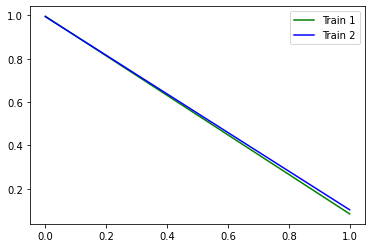

In [4]:
X_train, y_train = read("./HW-10-data/training")
vectorizer = CountVectorizer(lowercase =True, stop_words=None, max_df=1.0, min_df=1)
svd = TruncatedSVD(n_components=2,n_iter=50, random_state=42)
normalizer = Normalizer(copy = False)

lsa = make_pipeline(vectorizer,svd, normalizer)
X_SVD = lsa.fit_transform(X_train)
print(f"Explained variance ratio: {svd.explained_variance_ratio_}")
print(f"Singular values: {svd.singular_values_}")
X_SVD.shape
fig, ax = plt.subplots()
ax.plot(X_SVD[0], 'g', label='Train 1')
ax.plot(X_SVD[1], 'b', label='Train 2')
ax.legend()
print(f"Topic Doc 1: {label_dict[y_train[0]]}")
print(f"Topic Doc 2: {label_dict[y_train[1]]}")

### Load the test data, transform the documents into the latent vector space of the training model from a) and plot the resulting data into the same figure as a) but make sure they are distinguishable.


length corpus: 50
Topic Train 1: Skills and Hobbies
Topic Train 2: Skills and Hobbies
Topic Test 1: Skills and Hobbies
Topic Test 2: Skills and Hobbies


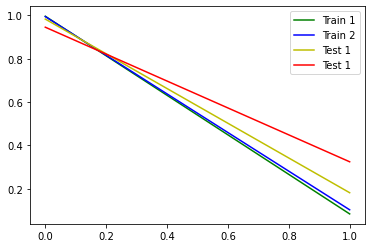

In [5]:
X_test, y_test = read("./HW-10-data/test")
X_SVD_test = lsa.transform(X_test)

fig, ax = plt.subplots()
ax.plot(X_SVD[0], 'g', label='Train 1')
ax.plot(X_SVD[1], 'b', label='Train 2')
ax.plot(X_SVD_test[0], 'y', label="Test 1")
ax.plot(X_SVD_test[1], 'r', label="Test 1")
ax.legend()

print(f"Topic Train 1: {label_dict[y_train[0]]}")
print(f"Topic Train 2: {label_dict[y_train[1]]}")
print(f"Topic Test 1: {label_dict[y_test[0]]}")
print(f"Topic Test 2: {label_dict[y_test[1]]}")

### Remove stopwords using a stopword list (this list can be found in the file stopwords.txt). Run again SVD and plot the training and test documents. Briefly describe differences to the plot in 1b)

In [6]:
def read_stopwords():
    p = "./HW-10-data/stopwords.txt"
    with open(p) as file:
        return file.read().split("\n")
stopwords = read_stopwords()

length corpus: 95


C:\Users\fmeyer\Anaconda3\envs\smolt\lib\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


Topic Doc 1: Skills and Hobbies
Topic Doc 2: Skills and Hobbies


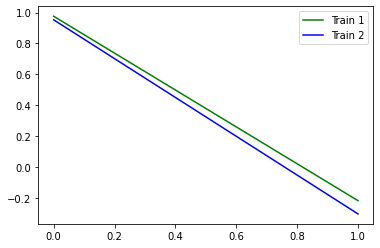

In [7]:
X_train, y_train = read("./HW-10-data/training")
vectorizer2 = CountVectorizer(lowercase =True, stop_words=stopwords, max_df=1.0, min_df=1)
svd2 = TruncatedSVD(n_components=2,n_iter=50, random_state=42)
normalizer2 = Normalizer(copy = False)
lsa2 = make_pipeline(vectorizer2,svd2, normalizer2)
X_SVD2 = lsa2.fit_transform(X_train)
X_SVD2.shape
fig, ax = plt.subplots()
ax.plot(X_SVD2[0], 'g', label='Train 1')
ax.plot(X_SVD2[1], 'b', label='Train 2')
ax.legend()
print(f"Topic Doc 1: {label_dict[y_train[0]]}")
print(f"Topic Doc 2: {label_dict[y_train[1]]}")

length corpus: 50
Topic Train 1: Skills and Hobbies
Topic Train 2: Skills and Hobbies
Topic Test 1: Skills and Hobbies
Topic Test 2: Skills and Hobbies


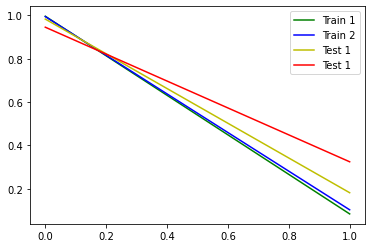

In [8]:
X_test, y_test = read("./HW-10-data/test")

X_SVD_test = lsa.transform(X_test)

fig, ax = plt.subplots()
ax.plot(X_SVD[0], 'g', label='Train 1')
ax.plot(X_SVD[1], 'b', label='Train 2')
ax.plot(X_SVD_test[0], 'y', label="Test 1")
ax.plot(X_SVD_test[1], 'r', label="Test 1")
ax.legend()

print(f"Topic Train 1: {label_dict[y_train[0]]}")
print(f"Topic Train 2: {label_dict[y_train[1]]}")
print(f"Topic Test 1: {label_dict[y_test[0]]}")
print(f"Topic Test 2: {label_dict[y_test[1]]}")

### 2

In [9]:
from sklearn.decomposition import LatentDirichletAllocation

X_train, y_train = read("./HW-10-data/training")
stopwords = read_stopwords()
vectorizer3 = CountVectorizer(lowercase =True, stop_words=stopwords, max_df=1.0, min_df=1)
X = vectorizer3.fit_transform(X_train)
lda = LatentDirichletAllocation(n_components=1, random_state=42, n_jobs=-1)
lda.fit(X)

length corpus: 95


C:\Users\fmeyer\Anaconda3\envs\smolt\lib\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


LatentDirichletAllocation(n_components=1, n_jobs=-1, random_state=42)

In [11]:
vocab = {v: k for k, v in vectorizer3.vocabulary_.items()}


'arianists'

In [13]:
def get_n_most_likely_words(vocab, lda_model, n=100):
    for i, topic in enumerate(lda_model.components_):
        print(len(topic))
        # get position of n highest values
        positions = topic.argsort()[-n:][::-1]
        print(n)
        print(len(positions))
        # get words for n highest positions
        words = [vocab[i] for i in positions]
        
        print(f"Topic {n}")
        for e, position in enumerate(positions):
            print(f"{e}: {words[e]}: {topic[position]}")
            
# TODO put results into dicts and merge them to get evolution of topics

In [14]:
get_n_most_likely_words(vocab, lda, n=100)

16732
100
100
Topic 100
0: time: 348.9999999999785
1: little: 213.99999999997854
2: don: 161.99999999997854
3: day: 160.99999999997857
4: eyes: 148.99999999997854
5: house: 146.99999999997857
6: didn: 145.99999999997854
7: people: 137.99999999997854
8: looked: 136.99999999997857
9: water: 133.99999999997854
10: hand: 128.99999999997857
11: head: 122.99999999997856
12: left: 120.99999999997857
13: home: 115.99999999997856
14: door: 113.99999999997856
15: john: 111.99999999997857
16: united: 110.99999999997856
17: world: 107.99999999997858
18: found: 105.99999999997857
19: island: 103.99999999997858
20: night: 102.99999999997858
21: business: 101.9999999999786
22: told: 100.9999999999786
23: life: 99.99999999997858
24: pool: 93.99999999997858
25: set: 93.99999999997858
26: look: 92.99999999997857
27: half: 91.9999999999786
28: feet: 90.9999999999786
29: white: 89.9999999999786
30: government: 89.9999999999786
31: tell: 89.9999999999786
32: fiscal: 88.99999999997858
33: church: 87.9999999